In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
from oggm.utils import mkdir
import oggm
import geopandas as gpd
import sys

/home/lilianschuster/anaconda3/envs/oggm_v16/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [24]:
model_author = 'GO'
gcms = ['gfdl-esm4', 'ipsl-cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0', 'ukesm1-0-ll' ]
scenarios = ['historical','ssp126','ssp370','ssp585']
y0_times = [1851, 1901, 1951, 1995, 2021, 2041, 2061, 2081]

(0.0, 500.0)

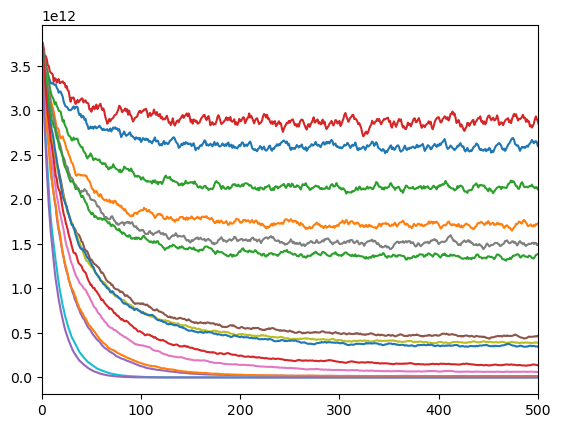

In [30]:
folder_path = f'' 

for y0_time in [2081]:
    period = f'{y0_time}-{y0_time+19}'
    if y0_time in [1851, 1901, 1951, 1995]:
        scenarios_sel = ['historical']
    else:
        scenarios_sel = scenarios[1:]
    # just because I have to repeat the 1995 again !!!
    for scenario in scenarios_sel:
        for gcm in gcms:
            #path = folder_path + f'{rgi_reg}/{model_author}_rgi{rgi_reg}_glaciers_{period}_{gcm}_{scenario}*.nc'
            path = folder_path + f'{model_author}_rgi06_sum_{period}_{gcm}_{scenario}.nc'
            #try:
            #ds = xr.open_dataset(path)
            #ds = ds.load()
            #except:
            #    path = folder_path + f'RGI{rgi_reg}/{gcm}_{scenario}_{period}_stop.nc'
            #    ds = xr.open_dataset(path)
            with xr.open_dataset(path) as ds:
                #print(len(ds.isel(simulation_year=0).volume_m3.dropna(dim='rgi_id').rgi_id))
                ds = ds.volume_m3#.sum(dim='rgi_id').load()
            #ds_l = 100*ds/ds.isel(time=0)
            plt.plot(ds.simulation_year, ds)
            
            #init should be at ~
            v_init_itmix = 3.769574*1e12
            np.testing.assert_allclose(ds.isel(simulation_year=0), v_init_itmix, rtol=1e-3)
plt.xlim([0,500])

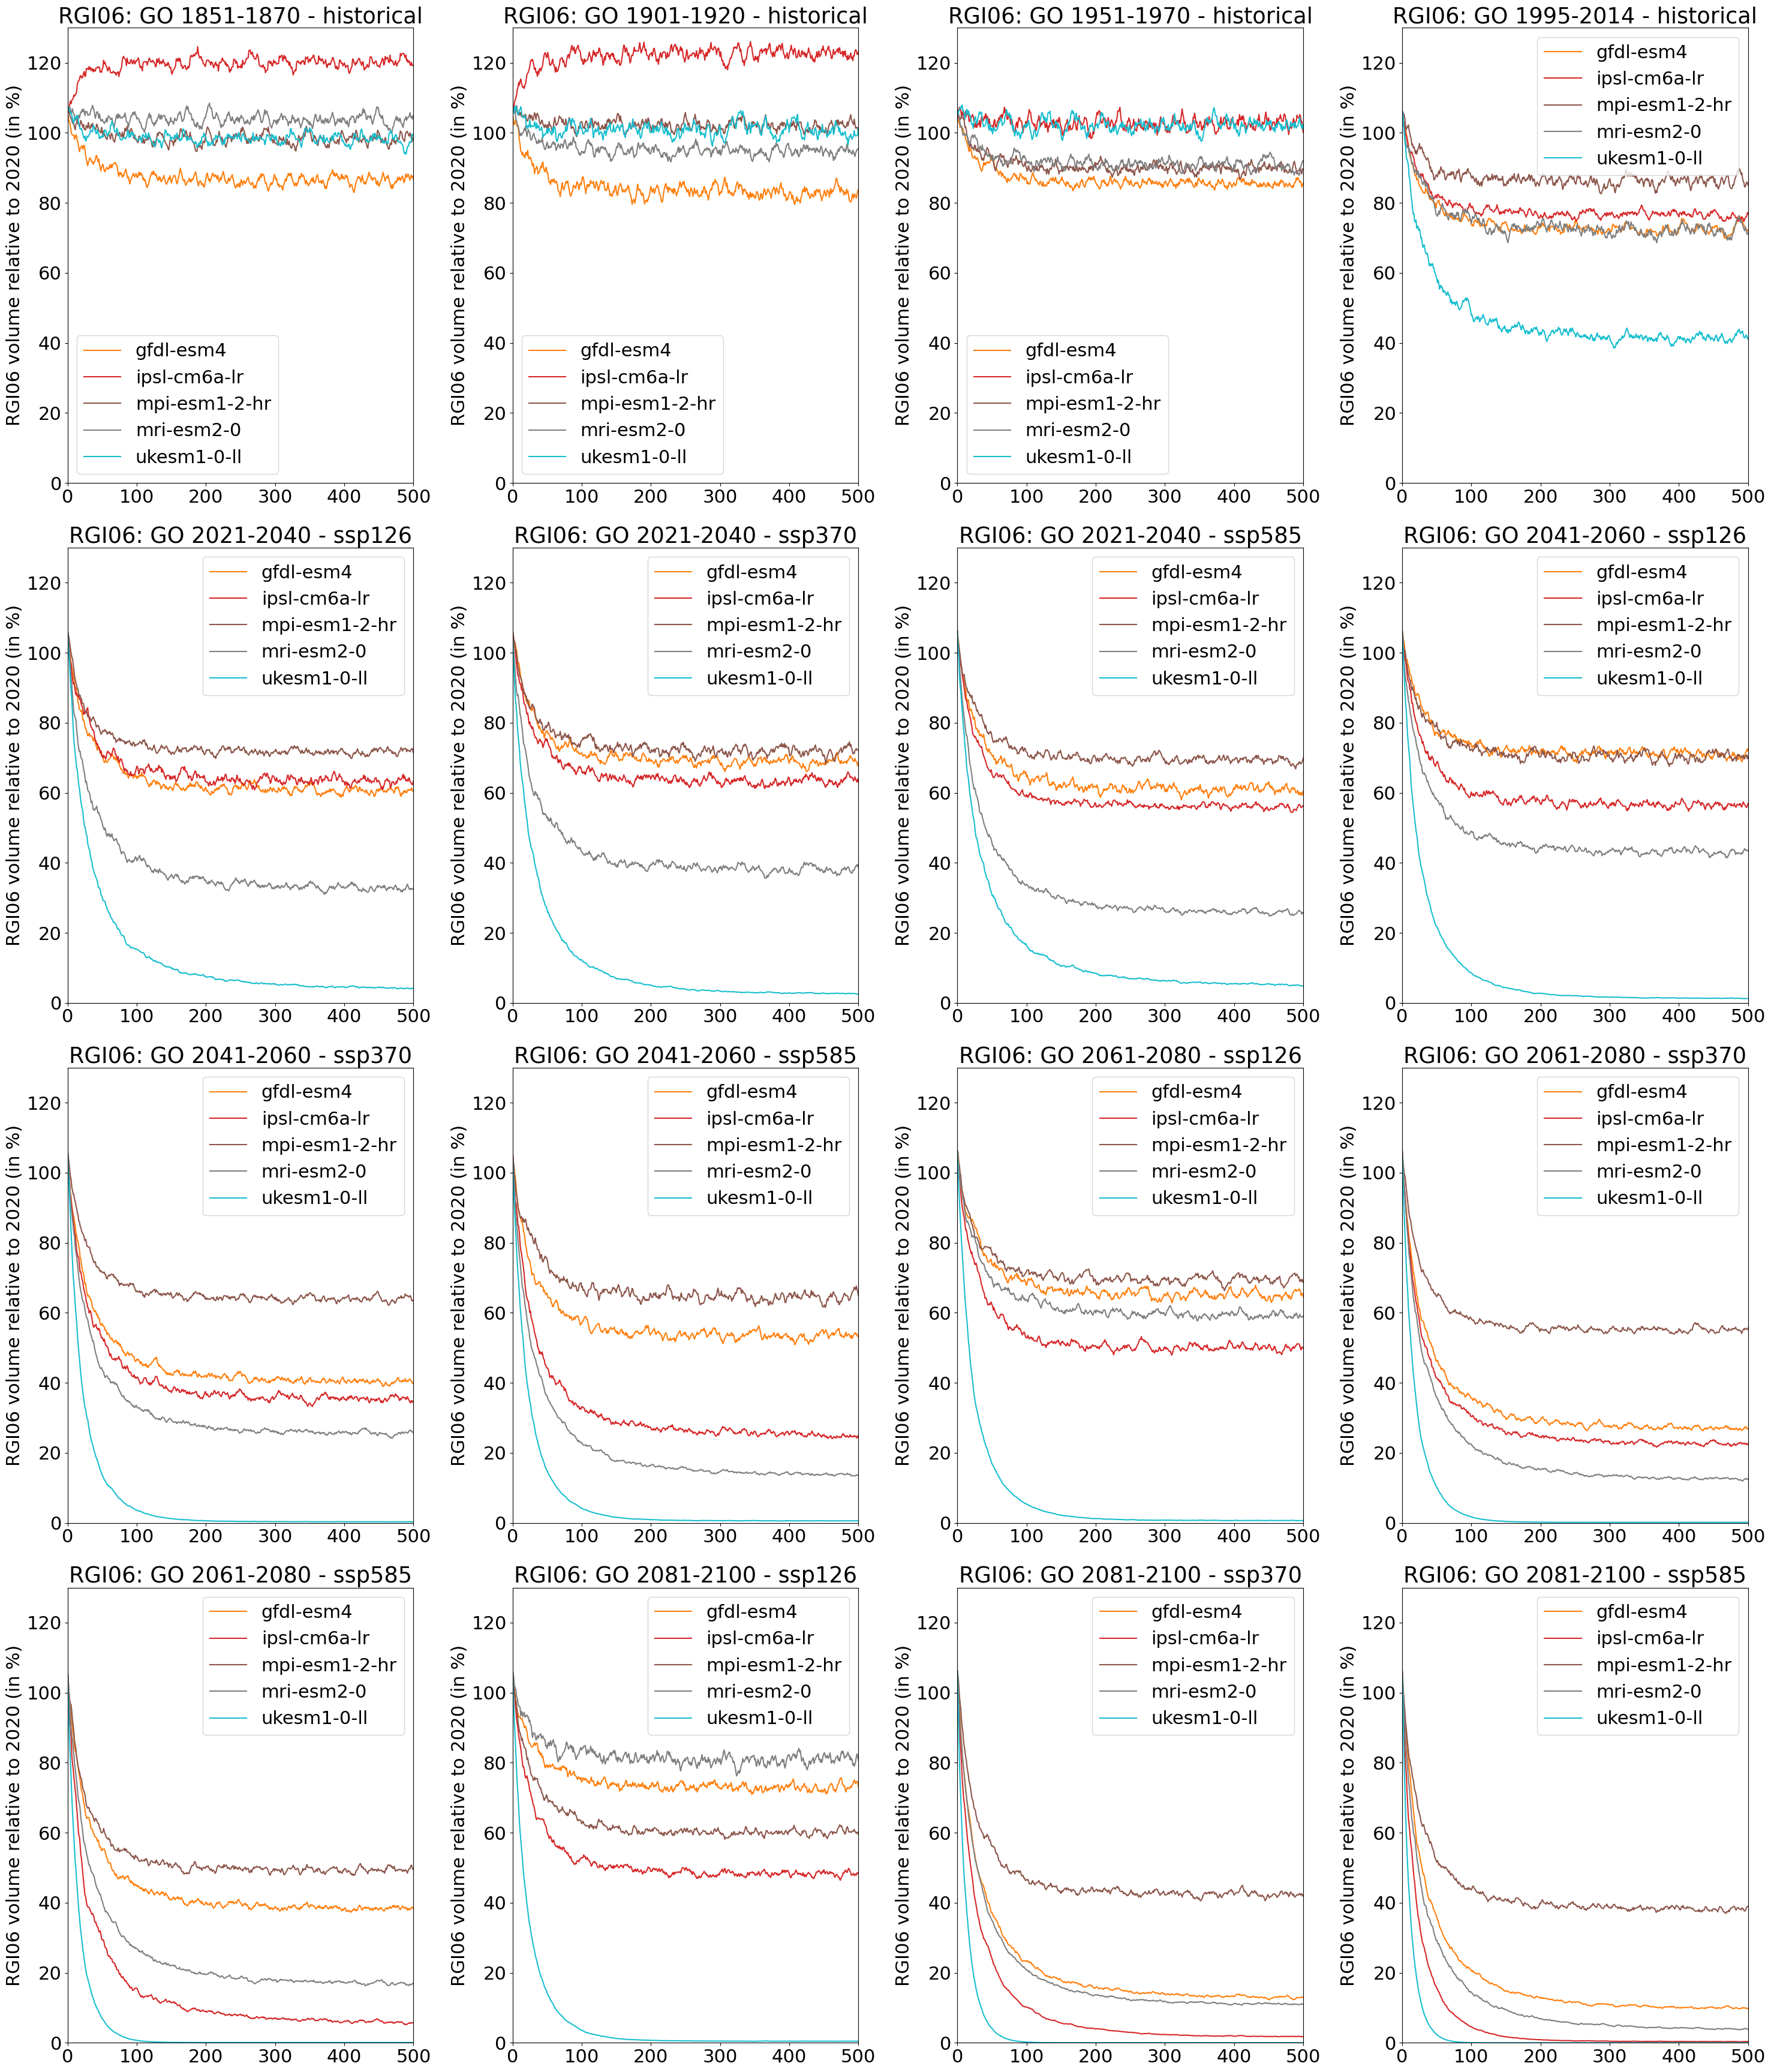

In [44]:
#plt.rc({'fontsize':20})
plt.rcParams.update({'font.size': 22})
folder_path = f'' 
fig, axs = plt.subplots(4,4, figsize=(30,35))
axs = axs.flatten()
j = 0
for y0_time in y0_times:
    period = f'{y0_time}-{y0_time+19}'
    if y0_time in [1851, 1901, 1951, 1995]:
        scenarios_sel = ['historical']
    else:
        scenarios_sel = scenarios[1:]
    # just because I have to repeat the 1995 again !!!
    for scenario in scenarios_sel:
        ax =axs[j]
        j+=1
        for gcm in gcms:
            #path = folder_path + f'{rgi_reg}/{model_author}_rgi{rgi_reg}_glaciers_{period}_{gcm}_{scenario}*.nc'
            path = folder_path + f'{model_author}_rgi06_sum_{period}_{gcm}_{scenario}.nc'
            #try:
            #ds = xr.open_dataset(path)
            #ds = ds.load()
            #except:
            #    path = folder_path + f'RGI{rgi_reg}/{gcm}_{scenario}_{period}_stop.nc'
            #    ds = xr.open_dataset(path)
            with xr.open_dataset(path) as ds:
                #print(len(ds.isel(simulation_year=0).volume_m3.dropna(dim='rgi_id').rgi_id))
                ds = ds.volume_m3#.sum(dim='rgi_id').load()
            #ds_l = 100*ds/ds.isel(time=0)
            ax.plot(ds.simulation_year, ds)
            ax.set_title(f'RGI06: GO {period} - {scenario}')
            #init should be at ~
            v_init_itmix = 3.769574*1e12
            v_2020_itmix = 3.5493*1e12
            np.testing.assert_allclose(ds.isel(simulation_year=0), v_init_itmix, rtol=1e-3)
            ax.plot(ds.simulation_year, 100*ds/v_2020_itmix, label=gcm)
            ax.set_ylim(0,130)
            ax.set_ylabel('RGI06 volume relative to 2020 (in %)')
        ax.legend()
        ax.set_xlim([0,500])
plt.tight_layout()

In [14]:
 xr.open_dataset(path).isel(time=0)

<xarray.Dataset>
Dimensions:         (time: 5001, rgi_id: 3927)
Coordinates:
  * time            (time) float64 0.0 1.0 2.0 3.0 ... 4.998e+03 4.999e+03 5e+03
  * rgi_id          (rgi_id) object 'RGI60-11.00001' ... 'RGI60-11.03927'
    hydro_year      (time) int64 ...
    hydro_month     (time) int64 ...
    calendar_year   (time) int64 ...
    calendar_month  (time) int64 ...
Data variables:
    volume          (time, rgi_id) float32 ...
    area            (time, rgi_id) float32 ...
    length          (time, rgi_id) float32 ...
    ela             (time, rgi_id) float32 ...
    spec_mb         (time, rgi_id) float32 ...
    min_hgt         (time, rgi_id) float32 ...
    max_hgt         (time, rgi_id) float32 ...
    tau_l           (time, rgi_id) float32 ...
    tau_a           (time, rgi_id) float32 ...
    water_level     (rgi_id) float32 ...
    glen_a          (rgi_id) float32 ...
    fs              (rgi_id) float32 ...
Attributes:
    description:    OGGM model output
    oggm_version:   1.0.1.dev737+g0fd8873
    calendar:       365-day no leap
    creation_date:  2023-02-08 10:47:50